# Descente de gradient

In [1]:
# 1
from sympy import *

x=Symbol('x')
E=expand((x-1)*(x-2)*(x-3)*(x-5))
derive_E=diff(E)

print("E(x)= ",E)
print("dérive_E(x) = ",derive_E)

E(x)=  x**4 - 11*x**3 + 41*x**2 - 61*x + 30
dérive_E(x) =  4*x**3 - 33*x**2 + 82*x - 61


In [2]:
# 2
def DG_E(x0,pas):
    epsilon=0.01
    n=0
    xi=x0
    xi1=xi-pas*derive_E.subs(x,xi).evalf()
    
    while True:
        xi=xi1
        xi1=xi-pas*derive_E.subs(x,xi).evalf()
        n+=1
        if n>=1000 or abs(xi1-xi)<epsilon:
            break
            
    print("x0:",x0," | pas=",pas," | Minimum trouvé:",xi1," | Le nombre d’itérations est:",n)
    
    return xi1

In [3]:
# 3,4
all_xmin_derivee = []
all_xmin_derivee.append(DG_E(5,0.001))
all_xmin_derivee.append(DG_E(5,0.01))
all_xmin_derivee.append(DG_E(5,0.1))
all_xmin_derivee.append(DG_E(5,0.17))
all_xmin_derivee.append(DG_E(5,1))
all_xmin_derivee.append(DG_E(0,0.001))


print("On constate qui il y a plus qu'un minimum pour la fonction E(X)")

x0: 5  | pas= 0.001  | Minimum trouvé: 4.66148331568632  | Le nombre d’itérations est: 21
x0: 5  | pas= 0.01  | Minimum trouvé: 4.36100829491372  | Le nombre d’itérations est: 9
x0: 5  | pas= 0.1  | Minimum trouvé: 4.48300247305520  | Le nombre d’itérations est: 1000
x0: 5  | pas= 0.17  | Minimum trouvé: 1.23789802112164  | Le nombre d’itérations est: 1000
x0: 5  | pas= 1  | Minimum trouvé: -5.59079531307448e+2165218897387849575449569542280595721495861785890200169487984640726689692623705307933951769342049549605036164832782173103034129608036149295080551194764987554074946681668978958079023089253294582547639268975015256397044116579963969577226087629587121543654371017833958596520034967414619393227754352672765506194522912424105740720275128204523067986059345070180384910080092271110636563888155462862848820544652709611781766626003237259515385703156691028186064669180469086499802903989431  | Le nombre d’itérations est: 1000
x0: 0  | pas= 0.001  | Minimum trouvé: 0.949407118070548  | Le nombre d’

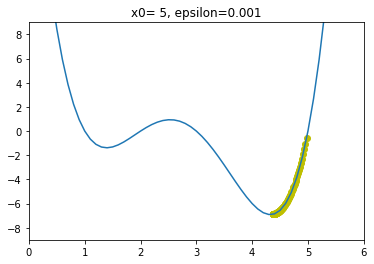

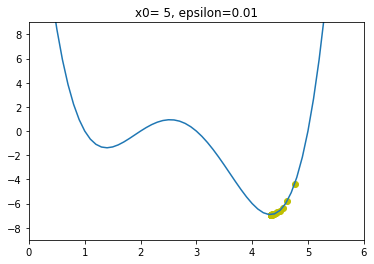

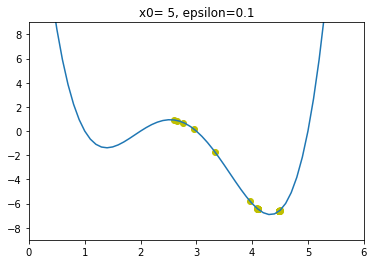

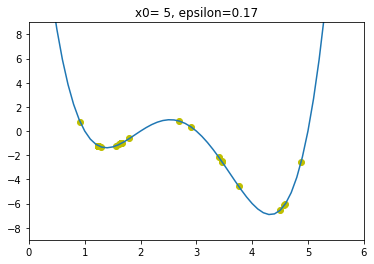

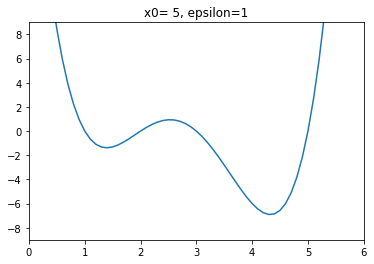

<Figure size 432x288 with 0 Axes>

In [5]:
# 5
import numpy as np
import matplotlib.pyplot as plt

all_xmin_fonction = [E.subs(x, r).evalf() for r in all_xmin_derivee]
X = [E.subs(x, r).evalf() for r in np.arange(0, 6, 0.1)]

def evolution_minmums(x0, n):
    point=x0
    plt.plot(np.arange(0, 6, 0.1), X)
    eps, nb_max_iter = 0.001, 1000
    i = 0
    while True:
        xi_1 = x0 - n*derive_E.subs(x, x0).evalf()
        t = abs(xi_1 - x0)
        x0 = xi_1
        plt.scatter(x0, E.subs(x, x0).evalf(), c='y')
        i+=1
        if (t < eps) | (i>nb_max_iter):
            break
    plt.xlim([0,6])
    plt.ylim(([-9,9]))
    plt.title("x0= "+str(point)+", epsilon="+str(n))

    plt.figure()

evolution_minmums(5,0.001)
evolution_minmums(5,0.01)
evolution_minmums(5,0.1)
evolution_minmums(5,0.17)
evolution_minmums(5,1)

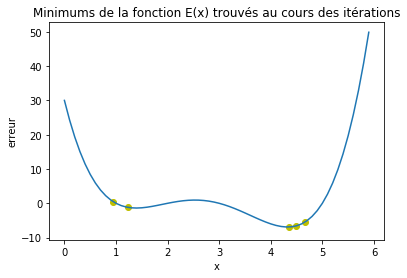

In [6]:
# 5
plt.plot(np.arange(0, 6, 0.1), X)
plt.scatter(all_xmin_derivee, all_xmin_fonction, c='y')
plt.xlabel('x')
plt.ylabel('erreur')
plt.title('Minimums de la fonction E(x) trouvés au cours des itérations')
plt.show()

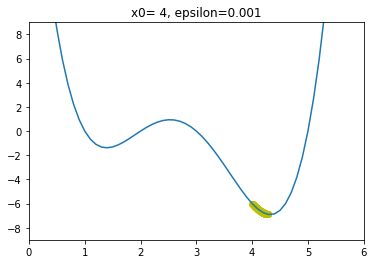

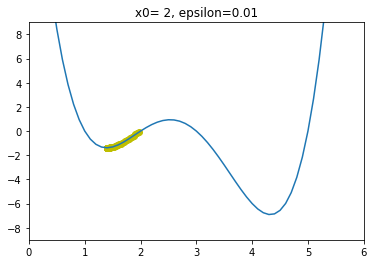

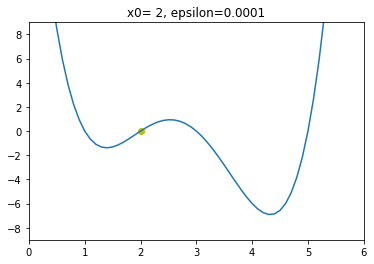

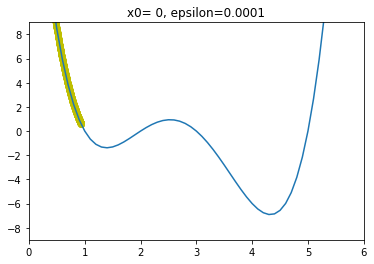

<Figure size 432x288 with 0 Axes>

In [7]:
# 6
evolution_minmums(4,0.001)
evolution_minmums(2,0.01)
evolution_minmums(2,0.0001)
evolution_minmums(0,0.0001)

# Descente de gradient pour la régression linéaire

In [8]:
# 1
x, a, b, y = symbols('x a b y')

div_a = expand(2*x*(a*x+b-y))
print('div_a(x) = ',div_a)

div_b = expand(2*(a*x+b-y))
print('div_b(x) = ',div_b)

div_a(x) =  2*a*x**2 + 2*b*x - 2*x*y
div_b(x) =  2*a*x + 2*b - 2*y


In [15]:

def DG(a0, b0, x_data, y_data, pas, eps, nb_max_iter):
    i = 0
    while True:
        sda = sum([div_a.subs([(x, xi), (a, a0), (b, b0), (y, yi)]).evalf() for xi, yi in zip(x_data, y_data)])
        sdb = sum([div_b.subs([(x, xi), (a, a0), (b, b0), (y, yi)]).evalf() for xi, yi in zip(x_data, y_data)])
    
        ai_1 = abs(a0 - n*sda)
        bi_1 = abs(b0 - n*sdb)
        ta = ai_1 - a0
        tb = bi_1 - b0
        a0 = ai_1
        b0 = bi_1
        i+=1
        if ((ta <= eps) & (tb <= eps)) | (i>nb_max_iter):
            break
        
    return [ai_1, bi_1, i]


In [25]:
# 3,4
from sklearn.datasets import make_regression
x, a, b, y = symbols('x a b y')
e = expand(a*x+b)
Err = expand(((a*x+b)-y)**2)
x_data, y_data = make_regression(n_samples=100, n_features=1)

def reg(x_data, y_data, pas, eps, nb_max_iter):
    res = DG(5, 5, x_data, y_data, pas, eps, nb_max_iter)
    print('a:', res[0])
    print('b:', res[1])
    print('Nombre des iterations:', res[2])
    sum = 0
    for i in range(100):
        sum += Err.subs([(x,x_data[i][0]),(a,res[0]),(b,res[1]),(y,y_data[i])]).evalf()
    print('E(a min ,b min ):', sum)
    
    pry = [e.subs([(x, x_d[0]), (a, res[0]), (b, res[1])]).evalf() for x_d in x_data]
    return res, pry

print('pas = 0.001, nombre_max = 1000')
res1 = reg(x_data, y_data, 0.001, 0.001, 1000)

print('pas = 0.001, nombre_max = 500')
res2 = reg(x_data, y_data, 0.001, 0.001, 500)

print('pas = 0.001, nombre_max = 1000')
res3 = reg(x_data, y_data, 0.001, 0.001, 1000)

print('pas = 0.01, nombre_max = 1000')
res4 = reg(x_data, y_data, 0.01, 0.001, 1000)

pas = 0.001, nombre_max = 1000
a: 29.0418399686691
b: 2.28417779298377e-5
Nombre des iterations: 46
E(a min ,b min ): 0.00138956058768847
pas = 0.001, nombre_max = 500
a: 29.0418399686691
b: 2.28417779298377e-5
Nombre des iterations: 46
E(a min ,b min ): 0.00138956058768847
pas = 0.001, nombre_max = 1000
a: 29.0418399686691
b: 2.28417779298377e-5
Nombre des iterations: 46
E(a min ,b min ): 0.00138956058768847
pas = 0.01, nombre_max = 1000
a: 17.1171990588173
b: 5.72316845524445
Nombre des iterations: 2
E(a min ,b min ): 16303.1781154891


In [26]:
# 5
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data.flatten(), y_data)
print("a=",slope,"\nb=",intercept,"\nerr=",std_err)

a= 29.045859435989506 
b= 0.0 
err= 0.0


r-squared: 1.0
r-squared: 1.0
r-squared: 1.0


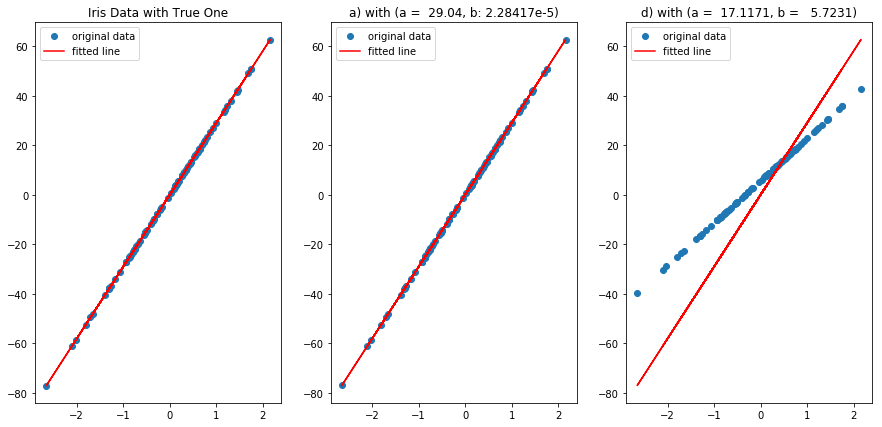

In [27]:
# 6
from scipy import stats

x = [e[0] for e in x_data]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y_data)

print("r-squared:", r_value**2)

x_data = x_data.flatten()

plt.rcParams["figure.figsize"] = (15,7)
plt.subplot(1, 3, 1)
plt.plot(x_data, y_data, 'o', label='original data')
plt.plot(x_data, intercept + slope*x_data, 'r', label='fitted line')
plt.title('Iris Data with True One')
plt.legend()


print("r-squared:", r_value**2)
plt.subplot(1, 3, 2)
plt.plot(x_data, res1[1], 'o', label='original data')
plt.plot(x_data, intercept + slope*x_data, 'r', label='fitted line')
plt.title('a) with (a =  29.04, b: 2.28417e-5)')
plt.legend()

print("r-squared:", r_value**2)
plt.subplot(1, 3, 3)
plt.plot(x_data, res4[1], 'o', label='original data')
plt.plot(x_data, intercept + slope*x_data, 'r', label='fitted line')
plt.title('d) with (a =  17.1171, b =   5.7231)')
plt.legend()

plt.show()